# Breast Cancer Wisconsin

## Data Challenge

You belong to the data team at a local research hospital. You&#39;ve been tasked with
developing a means to help doctors diagnose breast cancer. You&#39;ve been given data
about breast cells; where biopsied it is benign (not harmful) or malignant (cancerous).
1. What features of a cell are the largest drivers of malignancy?
2. How would a physician use your product?
3. There is a non-zero cost in time and money to collect each feature about a given
cell. How would you go about determining the most cost-effective method of
detecting malignancy?

## Data and Features

The dataset contains the following features for each cell:

* Sample code number: id number
* Clump Thickness: 1 - 10
* Uniformity of Cell Size: 1 - 10
* Uniformity of Cell Shape: 1 - 10
* Marginal Adhesion: 1 - 10
* Single Epithelial Cell Size: 1 - 10
* Bare Nuclei: 1 - 10
* Bland Chromatin: 1 - 10
* Normal Nucleoli: 1 - 10
* Mitoses: 1 - 10

* Class: (2 for benign, 4 for malignant)

## Approach

__This is a binary classification problem__

In this notebook:
- I first imported the data and the necessary packages
- I then did initial exploratory data analysis (EDA) to understand what the data is like
- The data required a number of cleaning steps, including removing duplicates and handling data input incorrectly
- I then looked at key metrics (mean, range, standard deviation etc..)
- I then did a basic implementation of both logistic regression and a random forest classifer  to see which was most useful for this data
- __Determining a metric was challenging, as there are repurcussions with both false positives (invasive treatment) and false negatives (missing cancerous cells). Although you can use the F1 score (optimizing both), I decided to optimize for high recall, as we want to minimize our false negatives, so that all malignant cells are picked up and the doctor is alerted. I think this is more important and there are downstream tests / tools that could be used to pick up false positives, however, I think it's most important that my model does not classify false negatives.__
- After some parameter optimization I looked at the important features
- With the important features, I could determine which were required to make the model work most efficiently
- I then exported the model, so that I could build a python-based web application with the model, for the doctor to interact with

# Setup

## Import packages

Import all necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
import pickle
import pandas_profiling as pp

from scipy import interp
from pivottablejs import pivot_ui
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, RepeatedStratifiedKFold, GridSearchCV, cross_validate
from sklearn import metrics
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from scipy.stats import shapiro
from scipy.stats import skew
from scipy.stats import kurtosis


## Load the data and Initial Data Analysis

In [2]:
# csv
filename = 'breast-cancer-wisconsin.txt'
df_raw = pd.read_csv(filename,
                    sep=',',
                    header='infer',
                    index_col='Index'
)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15855 entries, 0 to 15854
Data columns (total 11 columns):
ID                             15855 non-null int64
Clump Thickness                15855 non-null int64
Uniformity of Cell Size        15827 non-null object
Uniformity of Cell Shape       15827 non-null object
Marginal Adhesion              15827 non-null object
Single Epithelial Cell Size    15827 non-null object
Bare Nuclei                    15827 non-null object
Bland Chromatin                15827 non-null object
Normal Nucleoli                15827 non-null object
Mitoses                        15827 non-null object
Class                          15827 non-null object
dtypes: int64(2), object(9)
memory usage: 1.5+ MB


There are 12 columns; 15855 entries - there are 28 rows in the last 9 columns that have null values. These columns are also objects, so will need to be converted to numberical values.
I want to be able to see all of the data, so will turn off "max_rows"

In [4]:
pd.options.display.max_rows = None

In [5]:
df_raw.head(200)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,4
1,1107684,6,10,5,5,4,10,6,10,1,4
2,691628,8,6,4,10,10,1,3,5,1,4
3,1226612,7,5,6,3,3,8,7,4,1,4
4,1142706,5,10,10,10,6,10,6,5,2,4
5,601265,10,4,4,6,2,10,2,3,1,4
6,378275,10,9,7,3,4,2,7,7,1,4
7,1142706,5,10,10,10,6,10,6,5,2,4
8,601265,10,4,4,6,2,10,2,3,1,4


## Data Cleaning and converting to numerical variables

### Check for missing data

Look at the categories and values of the data

In [6]:
for col in df_raw.columns:
    if col == 'ID':
        continue
    print(df_raw[col].value_counts())

10     5070
7      4023
8      3046
5      1129
3      1108
6      1034
1       145
4        80
2        50
100      48
70       47
80       29
9        14
60       12
30        9
50        8
40        3
Name: Clump Thickness, dtype: int64
10         4051
6          4005
5          2020
8          2018
3          1047
4          1033
9          1003
1           382
2            45
60           43
100          34
?            23
80           20
50           19
7            19
No idea      17
30           17
#            11
90            9
40            9
20            2
Name: Uniformity of Cell Size, dtype: int64
4          4022
5          3020
6          3010
10         2055
7          2022
3          1050
1           351
2            59
40           47
60           32
50           28
8            28
?            23
No idea      17
70           16
100          15
30           14
#            11
9             7
Name: Uniformity of Cell Shape, dtype: int64
3          4035
10         3052

Missing values are labeled with ?, No idea,#, I will replace this with NaN

In [7]:
missing_dict = {'?': np.nan, 'No idea': np.nan, '#': np.nan}
df_raw = df_raw.replace(to_replace=missing_dict)

### Check for duplicates and treating null values

In [8]:
number_duplicate_rows = df_raw.duplicated().value_counts().loc[True]
percent_duplicate_rows = number_duplicate_rows / len(df_raw.index) * 100
print('%d rows (%.2f %%) are duplicates' %(number_duplicate_rows, percent_duplicate_rows))



15127 rows (95.41 %) are duplicates


In [9]:
# drop duplicates of rows, just keeping one row
df_raw = df_raw.drop_duplicates(subset=None, keep="first", inplace=False)

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 15779
Data columns (total 11 columns):
ID                             728 non-null int64
Clump Thickness                728 non-null int64
Uniformity of Cell Size        710 non-null object
Uniformity of Cell Shape       710 non-null object
Marginal Adhesion              710 non-null object
Single Epithelial Cell Size    710 non-null object
Bare Nuclei                    694 non-null object
Bland Chromatin                710 non-null object
Normal Nucleoli                710 non-null object
Mitoses                        710 non-null object
Class                          710 non-null object
dtypes: int64(2), object(9)
memory usage: 68.2+ KB


There are now 728 rows and 4.5% are null values, so I will drop these.
However, as a future project, I will look to see whether bare nuclei is a meaningful feature and whether we could remove bare nuclei instead

In [11]:
df_raw = df_raw.dropna(axis=0)

In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 15779
Data columns (total 11 columns):
ID                             694 non-null int64
Clump Thickness                694 non-null int64
Uniformity of Cell Size        694 non-null object
Uniformity of Cell Shape       694 non-null object
Marginal Adhesion              694 non-null object
Single Epithelial Cell Size    694 non-null object
Bare Nuclei                    694 non-null object
Bland Chromatin                694 non-null object
Normal Nucleoli                694 non-null object
Mitoses                        694 non-null object
Class                          694 non-null object
dtypes: int64(2), object(9)
memory usage: 65.1+ KB


In [13]:
num_duplicate_ids_different_values = len(df_raw.index) - len(df_raw['ID'].unique())
print('There are %d rows with duplicate IDs but different values in some features.' %num_duplicate_ids_different_values)



There are 44 rows with duplicate IDs but different values in some features.


I will keep the duplicate IDs, because it may result from a patient having follow up IDs

### Converting to numerical values

Many of the columns are non-numeric, I will convert to numerical values.

In [14]:
df_raw = df_raw.apply(pd.to_numeric, errors='coerce').astype('int')

In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 694 entries, 0 to 15779
Data columns (total 11 columns):
ID                             694 non-null int64
Clump Thickness                694 non-null int64
Uniformity of Cell Size        694 non-null int64
Uniformity of Cell Shape       694 non-null int64
Marginal Adhesion              694 non-null int64
Single Epithelial Cell Size    694 non-null int64
Bare Nuclei                    694 non-null int64
Bland Chromatin                694 non-null int64
Normal Nucleoli                694 non-null int64
Mitoses                        694 non-null int64
Class                          694 non-null int64
dtypes: int64(11)
memory usage: 65.1 KB


In [16]:
for col in df_raw.columns:
    if col == 'ID':
        continue
    print(df_raw[col].value_counts())

1      135
5      126
3      102
4       79
10      70
2       50
8       44
6       32
7       23
9       12
70       5
100      5
80       3
40       3
30       2
60       2
50       1
Name: Clump Thickness, dtype: int64
1      366
10      67
3       51
2       45
4       38
5       30
8       28
6       25
7       19
9        6
60       4
100      4
50       3
20       2
30       2
80       2
90       1
40       1
Name: Uniformity of Cell Size, dtype: int64
1      339
10      59
2       58
3       53
4       43
5       31
7       30
6       29
8       27
9        7
40       5
60       4
50       3
100      2
70       2
30       2
Name: Uniformity of Cell Shape, dtype: int64
1      385
3       58
10      58
2       56
4       33
8       25
5       23
6       21
7       13
30       6
100      4
9        4
40       2
50       2
60       2
70       1
20       1
Name: Marginal Adhesion, dtype: int64
2      371
3       70
4       48
1       42
6       40
5       39
10      29
8       20
7

There are many categories that are multiples of 10, I beileve these are an input error and will / 10 so they are on the scale of 1-10.

In [17]:
columns_without_id = df_raw.columns.tolist()[1:]
for col in columns_without_id:
    df_raw[col] = df_raw[col].apply(lambda x: x if x <= 10 else int(x/10))

In [18]:
df_raw.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.940000e+02,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,1.378008e+06,4.530259,3.256484,3.304035,2.951009,3.237752,3.665706,3.475504,2.998559,1.825648,2.726225
std,1.820691e+06,2.840357,3.105259,3.005250,2.934675,2.191342,3.684616,2.445682,3.123481,2.160883,0.962487
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.965960e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.174094e+06,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.251769e+06,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


I will turn the malignant and benign classification into numerical variables of "0" and "1".

In [19]:
#transform Class 'benign' 2 --> 0 and 'malignant' 4 --> 1
df_raw.Class = df_raw.Class.replace({2:0, 4:1})

In [20]:
df_raw.head()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Index,,,,,,,,,,,
0,1241035,7,8,3,7,4,5,7,8,2,1
1,1107684,6,10,5,5,4,10,6,10,1,1
2,691628,8,6,4,10,10,1,3,5,1,1
3,1226612,7,5,6,3,3,8,7,4,1,1
4,1142706,5,10,10,10,6,10,6,5,2,1


In [21]:
df = df_raw

# EDA (Exploratory Data Analysis) and Figures

Now all the columns are numerical values, we can look at the mean, sd, min and max values

In [22]:
df.describe()

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.940000e+02,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000,694.000000
mean,1.378008e+06,4.530259,3.256484,3.304035,2.951009,3.237752,3.665706,3.475504,2.998559,1.825648,0.363112
std,1.820691e+06,2.840357,3.105259,3.005250,2.934675,2.191342,3.684616,2.445682,3.123481,2.160883,0.481244
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.965960e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.174094e+06,4.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.251769e+06,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


For all columns, the min is 1 and the max is 10, as we would expect and the class is either 1 or 0

In [23]:
pp.ProfileReport(df)

There are 442 benign cases and 252 malignant cases in the dataset. That means there are 36.31 % malignant cases in the dataset making it balanced enough.


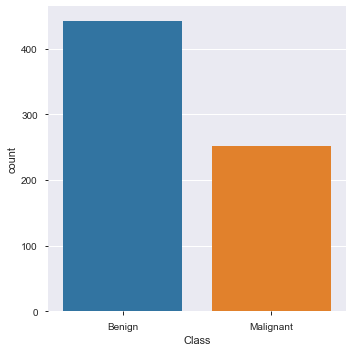

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = sns.countplot(data=df, x='Class')
plt.xticks(np.arange(2), ('Benign', 'Malignant'))
fig.tight_layout()

num_benign = len(df[df.Class == 0].index)
num_malignant = len(df[df.Class == 1].index)
per_malignant = num_malignant / (num_malignant + num_benign) * 100

print('There are %d benign cases and %d malignant cases in the dataset. That means there are %.2f %% malignant cases in the dataset making it balanced enough.' %(num_benign, num_malignant, per_malignant))

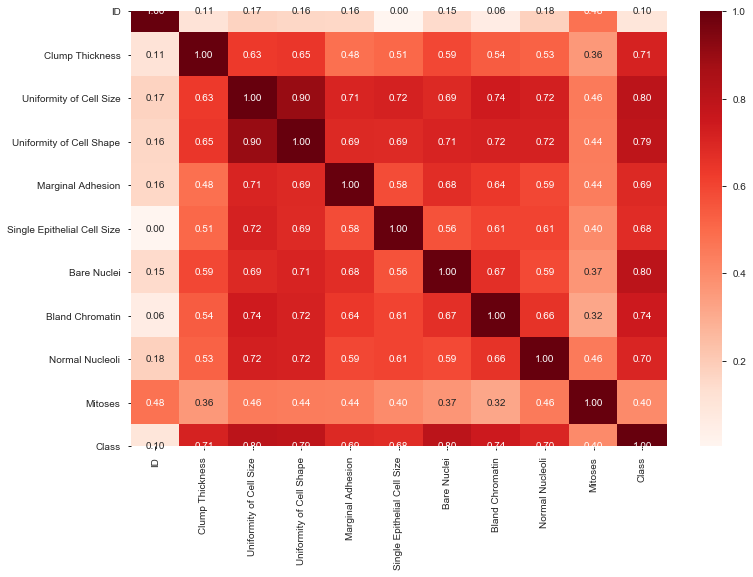

In [25]:
plt.figure(figsize=(12,8))
cor = df.corr(method='pearson')
sns.heatmap(cor, annot=True, fmt='0.2f', cmap=plt.cm.Reds)
plt.show()

Looking at the "Class" column, the features that strongly correlated with Class were:
- Uniformity of Cell Size
- Bare nuclei
- Uniformity of Cell Shape
- Bland Chromatin
- Clump Thickness
- Normal Nucleoli
- Marginal Adhesion
- Single Epithelial Cell Size

Features that didn't strong correlate with Class were:
- ID
- Mitosis

Additionally - uniformity of cell size and uniformity of cell shape are strongly correlated, so we probably don't need both of these features

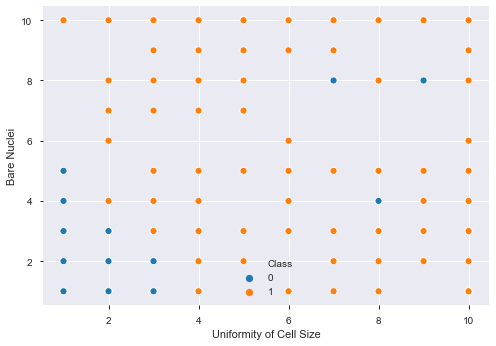

In [26]:
ax = sns.scatterplot(x=df['Uniformity of Cell Size'], y=df['Bare Nuclei'], hue=df['Class'])


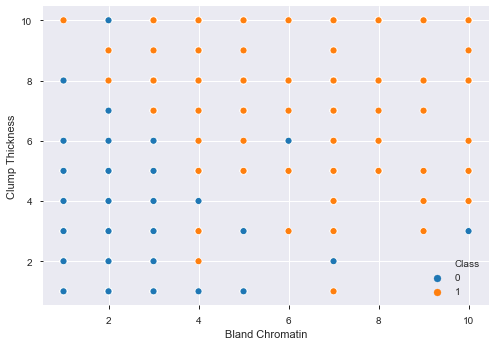

In [27]:
ax = sns.scatterplot(x=df['Bland Chromatin'], y=df['Clump Thickness'], hue=df['Class'])



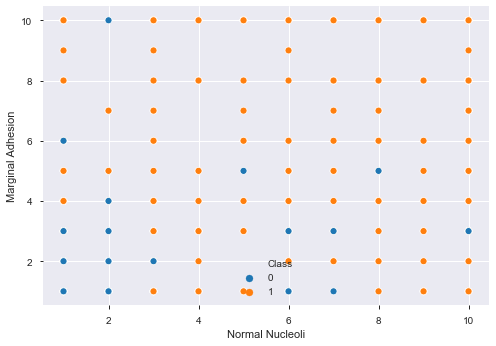

In [28]:
ax = sns.scatterplot(x=df['Normal Nucleoli'], y=df['Marginal Adhesion'], hue=df['Class'])



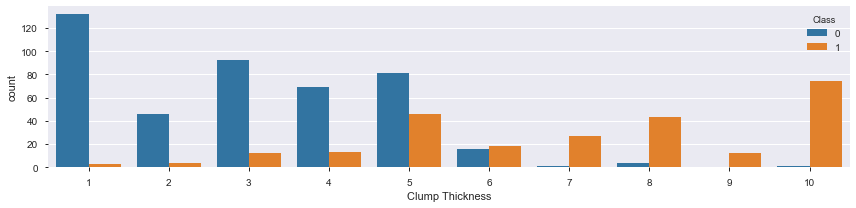

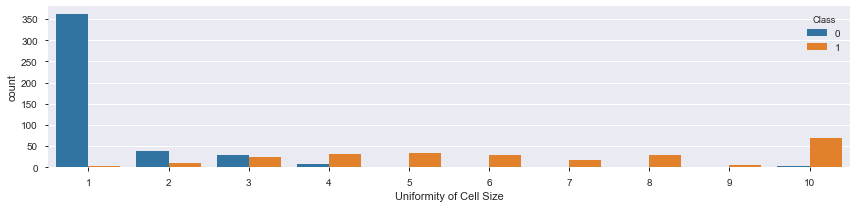

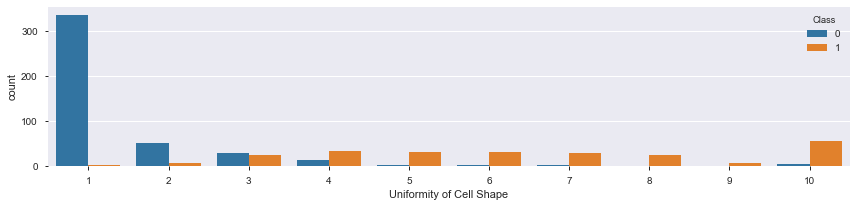

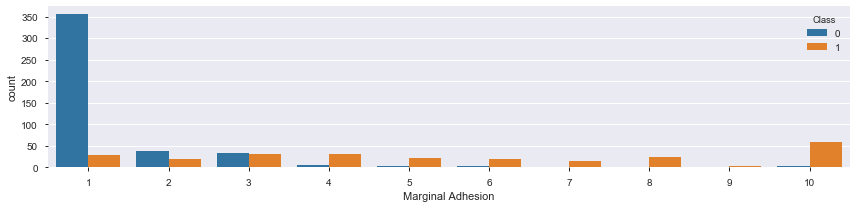

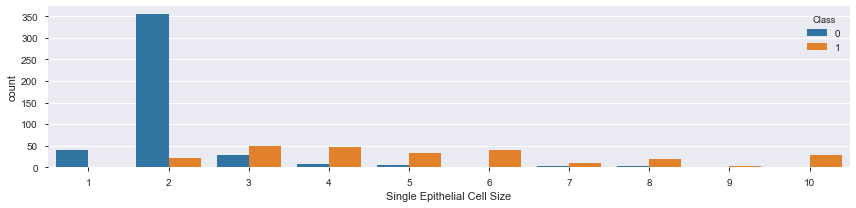

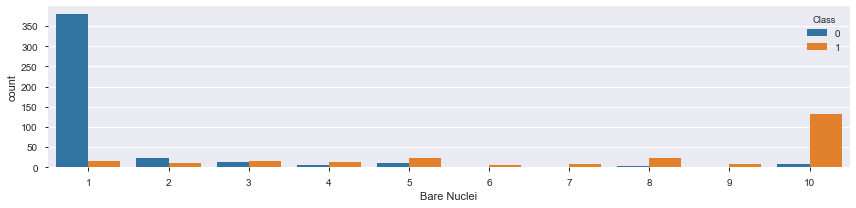

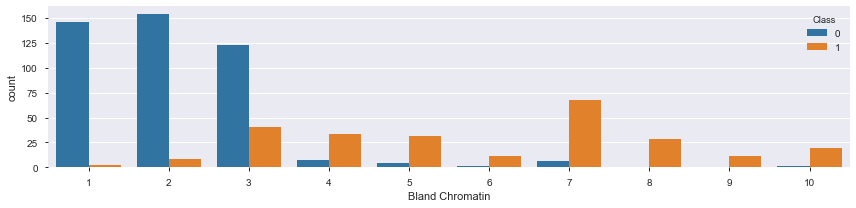

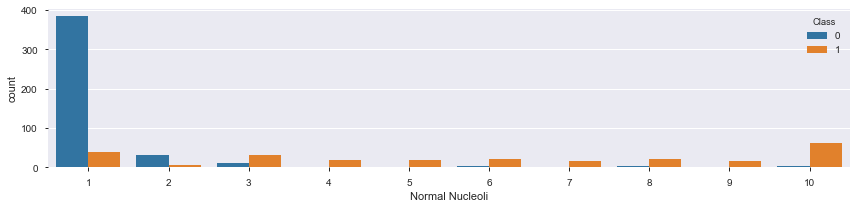

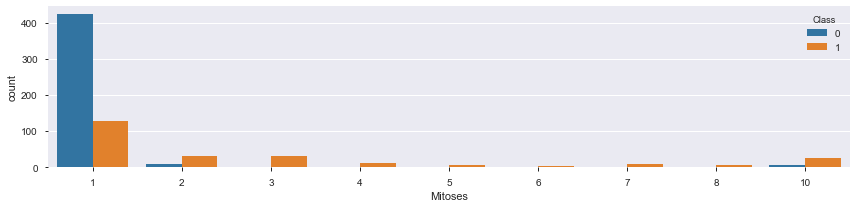

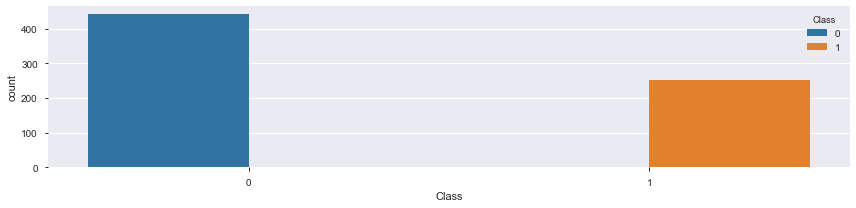

In [29]:
for col in columns_without_id:
    fig, ax = plt.subplots(figsize=(12, 3))
    sns.countplot(data=df, x=col, hue = 'Class')
    fig.tight_layout()

We can see that the malignant cells occur more frequently when:
- __clump thickness is higher__
- __uniformity of cell size and shape is higher__
- __bare nuclei is higher__

# Models

## Splitting data into training and test sets

I will now remove ID, class and uniformity of cell shape from the data (since the cell shape and cell size were highly correlated)

In [30]:
y = df.Class
X = df.drop(['Class', 'ID', 'Uniformity of Cell Shape'], axis=1)
X.shape, y.shape

((694, 8), (694,))

Since we don't have much data, I will only split into training and test data, 75:25, instead of 60:20:20 training:validation:test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state=1, stratify=y, shuffle=True)

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((520, 8), (520,), (174, 8), (174,))

## Identify the best model for this dataset

For all the X values, the data is from 1-10, so we don't need to scale the data

In [32]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())
def print_score(clf, X_train, y_train, X_test, y_test):
    res = [rmse(clf.predict(X_train), y_train),
           rmse(clf.predict(X_test), y_test),
           clf.score(X_train, y_train), clf.score(X_test, y_test)]
    if hasattr(clf, 'oob_score_'): res.append(clf.oob_score_)
    print(res)

In [33]:
clf_RF_default = RandomForestClassifier(random_state=1)
clf_RF_default.fit(X_train, y_train)
print_score(clf_RF_default, X_train, y_train, X_test, y_test)

[0.0, 0.21442250696755896, 1.0, 0.9540229885057471]


In [34]:
clf_LR_default = LogisticRegression(random_state=1).fit(X_train, y_train)
print(clf_LR_default.score(X_train, y_train))

predictions = clf_LR_default.predict(X_test)
print(accuracy_score(y_test, predictions))


0.9653846153846154
0.9482758620689655


The randon forest is performing better, so I will optimize these hyperparameters

In [35]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3, 5, 10], 
    'n_estimators' : [100, 300],
    'max_depth': [2, 4, 6, 8],
    'max_features': [5, 7, 9]
}

scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
}

In [36]:
def grid_search_wrapper(refit_score='recall_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=10)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train.values, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test.values)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

In [37]:
grid_search_clf = grid_search_wrapper(refit_score='recall_score')


Best params for recall_score
{'max_depth': 4, 'max_features': 7, 'min_samples_split': 3, 'n_estimators': 100}

Confusion matrix of Random Forest optimized for recall_score on the test data:
     pred_neg  pred_pos
neg       105         6
pos         5        58


In [38]:
clf = RandomForestClassifier(random_state=1, max_depth=4, min_samples_split=10, n_estimators=100)
clf.fit(X_train, y_train)
print_score(clf, X_train, y_train, X_test, y_test)
recall_score(y_test, clf.predict(X_test), average='macro')


[0.15811388300841897, 0.2005738892714385, 0.975, 0.9597701149425287]


0.9581724581724582

## Feature Importance and Feature Selection with Random Forest

Confusion matrix of training and validation

In [39]:
cm_train = pd.crosstab(clf.predict(X_train), y_train)
cm_train


Class,0,1
row_0,,
0,321,3
1,10,186


In [40]:
cm_test = pd.crosstab(clf.predict(X_test), y_test)
cm_test


Class,0,1
row_0,,
0,107,3
1,4,60


Plot of feature importance

In [41]:
fi = pd.DataFrame({'Feature': list(X_train.columns),
                   'Importance': clf.feature_importances_}).\
                    sort_values('Importance', ascending = True)

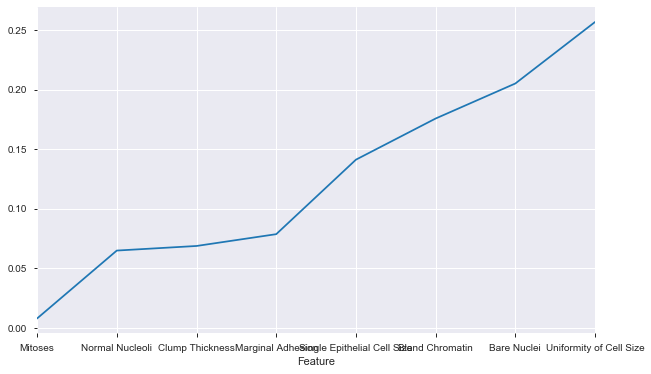

In [42]:
fi.plot('Feature', 'Importance', figsize=(10,6), legend=False);

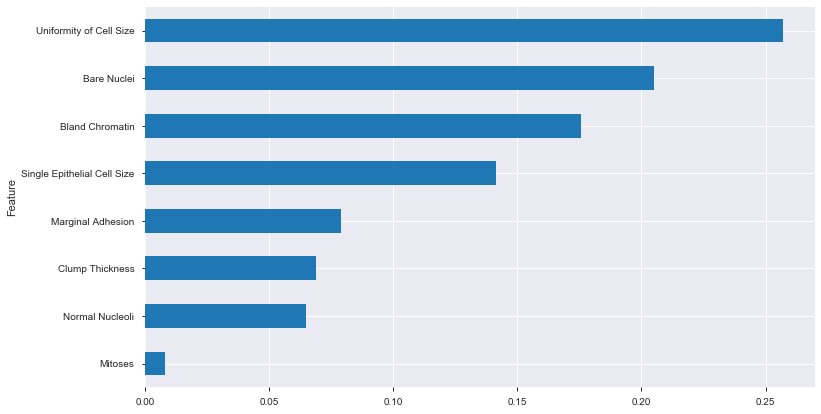

In [43]:
fi_plot = fi.plot('Feature','Importance', 'barh', figsize=(12,7), legend=False)


In [44]:
fi

,Feature,Importance
7,Mitoses,0.008010
6,Normal Nucleoli,0.065017
0,Clump Thickness,0.068866
2,Marginal Adhesion,0.078780
3,Single Epithelial Cell Size,0.141309
5,Bland Chromatin,0.175858
4,Bare Nuclei,0.205263
1,Uniformity of Cell Size,0.256897


Keep only the features that have a meaningful impact on the model

In [45]:
to_keep = fi[fi.Importance>0.05].Feature
to_keep

6                Normal Nucleoli
0                Clump Thickness
2              Marginal Adhesion
3    Single Epithelial Cell Size
5                Bland Chromatin
4                    Bare Nuclei
1        Uniformity of Cell Size
Name: Feature, dtype: object

In [46]:
X_train_keep = X_train[to_keep]
X_test_keep = X_test[to_keep]


In [47]:
X_train_keep.shape, X_test_keep.shape, y_train.shape, y_test.shape

((520, 7), (174, 7), (520,), (174,))

In [48]:
clf_keep = RandomForestClassifier(random_state=1, max_depth=4, min_samples_split=10, n_estimators=100)
clf_keep.fit(X_train_keep, y_train)
print_score(clf_keep, X_train_keep, y_train, X_test_keep, y_test)
recall_score(y_test, clf_keep.predict(X_test_keep), average='macro')


[0.15191090506255, 0.2005738892714385, 0.9769230769230769, 0.9597701149425287]


0.9581724581724582

Precision took a dip, but we're now only using 5 features

# Results

In [49]:
cm_test = pd.crosstab(clf_keep.predict(X_test_keep), y_test)
cm_test


Class,0,1
row_0,,
0,107,3
1,4,60


Text(0, 0.5, 'Predicted label')

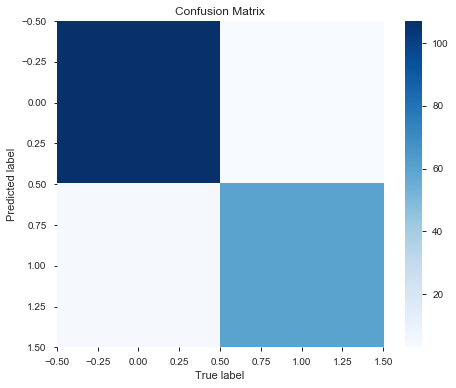

In [50]:
cmap = plt.get_cmap('Blues')
plt.figure(figsize=(8, 6))
plt.imshow(cm_test, cmap=cmap)
plt.title('Confusion Matrix')
plt.grid(False)
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
    

In [51]:
print(metrics.classification_report(y_test, clf_keep.predict(X_test_keep), digits=3))


              precision    recall  f1-score   support

           0      0.973     0.964     0.968       111
           1      0.938     0.952     0.945        63

    accuracy                          0.960       174
   macro avg      0.955     0.958     0.957       174
weighted avg      0.960     0.960     0.960       174



# Export

In [52]:
pickle.dump(clf_keep, open("final_model.pickle.dat", "wb"))

# Outcome

## Input data duplication
* 15855 rows in the provided dataset.
* 15127 (95.4%)  of provided rows contain duplicated information and were dropped.
* After removing duplicates, the dataset is fairly balanced: 
 * 442 benign cases
 * 252 malignant cases (36.3%)

## Features strongly describing malignancy
Uniformity of Cell Size and Cell Shape were strongly correlated (0.9) - perhaps something to do with a change of shape to support larger size.

Top 5 Features that are important to predict the output class ('benign', 'malignant'):
- Uniformity of Cell Size (0.8) / Shape (0.79)
- Bare nuclei (0.8)
- Bland Chromatin (0.74)
- Clump Thickness (0.71)
- Normal Nucleoli (0.7)

## Recall vs Precision
These multiple methods of detection are understood to provide a signal which will then be further investigated with additional tests. For this reason I wanted to deliver a high-recall solution that minimised false negative diagnoses, as these could have disastrous consequences. In practice there may be ethical, financial, and surgical outcome considerations after recommendation by a model like this. 

__Model evaluation based on recall__

__Models__
* The Random Forest outperformed the logistic regression with default parameters.
* Optimal feature count: 7 
* Optimal recall: 95.2%

These results are promising considering the small initial dataset, only 4 / 64 people with malignant tumors were missed. Recent research (https://breast-cancer-research.biomedcentral.com/articles/10.1186/s13058-019-1158-4)  suggests that these levels of performance may be higher than traditional methods. Accuracy may be improved further with additional work including hyperparameter tuning, feature engineering, and collection and incorporation of additional training data.

## Recommendation for application of the model by physicians
The identified important features can inform physicians what to pay special attention to while analysing breast cancer tumors.
A model such as the Random Forest can potential assist physicians in pre-filtering patient records.

## How would you go about determining the most cost-effective method of detecting malignancy?
Test results would be pre-screened by the model, providing guidance and focus during further patient evaluation and helping to improve the consistency of diagnosis for physicians of varied experience or working conditions. The feature importance should provide weighting for them to evaluate conflicting indications from different tests.

## Ideas to determine the most cost effective tests to predict malignancy
* Use “test cost” as a weighting on the feature importance
* Train multiple models based on a search of all the different combinations of tests. It may be that a couple of low-cost tests when combined are as good a predictor as one of the more expensive tests, and so the diagnosis product could be rolled out to a much larger set of patients, saving lives.

## Next Steps
* Data issues and assumptions:
 * Investigate the source of duplication in the input data - it calls into question the quality of the dataset as a whole.
 * Investigate the reason why some input values were > 10. For training these were assumed to be input errors and divided by 10 before processing.

* Parameter tuning
 * Parameter tuning for Logistic regression.
 * Hyperparameter Grid Search to improve the random forest classifier
 * There are 44 rows with duplicate IDs but different values for some features. These were left in the dataset, but should be evaluated with a physician
 